In [23]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

In [24]:
MAKANAN = {
    "Nasi Goreng": [50, 20000],
    "Mie Goreng": [50, 18000],
    "Ayam Goreng": [50, 25000],
    "Bakso": [50, 20000],
    "Sate Ayam": [50, 25000],
    "Gado-Gado": [100, 15000],
    "Soto Ayam": [100, 18000],
    "Rendang": [100, 30000],
    "Sate Kambing": [100, 35000],
    "Nasi Uduk": [100, 15000],
    "Nasi Padang": [100, 25000],
    "Lontong Sayur": [100, 15000],
    "Pempek": [100, 20000],
    "Martabak": [100, 30000],
    "Bubur Ayam": [100, 15000],
    "Nasi Liwet": [100, 25000],
    "Gudeg": [100, 20000],
    "Rawon": [100, 25000],
    "Sop Buntut": [100, 40000],
    "Sop Iga": [100, 35000],
    "Sate Padang": [100, 25000],
    "Ayam Betutu": [100, 30000],
    "Tahu Gejrot": [100, 10000],
    "Ketoprak": [100, 15000],
    "Kerak Telor": [100, 20000],
    "Nasi Kuning": [100, 15000],
    "Soto Betawi": [100, 25000],
    "Opor Ayam": [100, 20000],
    "Sambal Goreng": [100, 15000],
    "Pecel": [100, 15000],
    "Sate Lilit": [100, 30000],
    "Sate Maranggi": [100, 30000],
    "Asinan Betawi": [100, 15000],
    "Ayam Penyet": [100, 20000],
    "Ayam Taliwang": [100, 30000],
    "Bandeng Presto": [100, 25000],
    "Bebek Goreng": [100, 30000],
    "Bebek Betutu": [100, 35000],
    "Coto Makassar": [100, 25000],
    "Empal Gentong": [100, 30000],
    "Gulai Kambing": [100, 35000],
    "Ikan Bakar": [100, 30000],
    "Ikan Pepes": [100, 25000],
    "Karedok": [100, 15000],
    "Mie Aceh": [100, 20000],
    "Mie Kocok": [100, 20000],
    "Mie Tek-Tek": [100, 15000],
    "Nasi Campur": [100, 25000],
    "Nasi Gudeg": [100, 20000],
    "Nasi Kucing": [100, 10000],
    "Nasi Lemak": [100, 20000],
    "Nasi Pecel": [100, 15000],
    "Nasi Rawon": [100, 25000],
    "Pindang Patin": [100, 25000],
    "Rujak Cingur": [100, 20000],
    "Rujak Manis": [100, 15000],
    "Sate Madura": [100, 25000],
    "Sate Sapi": [100, 30000],
    "Soto Bandung": [100, 25000],
    "Soto Lamongan": [100, 20000],
    "Soto Madura": [100, 25000],
    "Tahu Sumedang": [100, 10000],
    "Tongseng": [100, 30000],
    "Tumis Kangkung": [100, 15000],
    "Udang Balado": [100, 35000],
    "Ayam Bakar": [100, 25000],
    "Bakmi Jawa": [100, 20000],
    "Bakso Malang": [100, 20000],
    "Capcay": [100, 20000],
    "Gulai Ikan": [100, 25000],
    "Ikan Asin": [100, 10000],
    "Ikan Goreng": [100, 20000],
    "Kepiting Saus Padang": [100, 40000],
    "Kolak": [100, 15000],
    "Kwetiau Goreng": [100, 20000],
    "Lumpia Semarang": [100, 15000],
    "Nasi Bebek": [100, 25000],
    "Nasi Brongkos": [100, 20000],
    "Nasi Goreng Kambing": [100, 25000],
    "Nasi Kebuli": [100, 30000],
    "Nasi Timbel": [100, 20000],
    "Pecel Lele": [100, 20000],
    "Pepes Tahu": [100, 15000],
    "Sambal Matah": [100, 10000],
    "Sambal Terasi": [100, 10000],
    "Sayur Asem": [100, 15000],
    "Sayur Lodeh": [100, 15000],
    "Serabi": [100, 10000],
    "Siomay": [100, 20000],
    "Sop Ayam": [100, 20000],
    "Sop Kambing": [100, 30000],
    "Sop Kaki Kambing": [100, 35000],
    "Soto Kudus": [100, 20000],
    "Soto Mie": [100, 20000],
    "Soto Padang": [100, 25000],
    "Tempe Mendoan": [100, 15000]
}


In [25]:
MINUMAN = {
    "Es Teh": [50, 5000],
    "Kopi": [50, 10000],
    "Jus Buah": [50, 15000],
    "Teh Tarik": [50, 8000],
    "Es Jeruk": [50, 6000],
    "Susu": [50, 7000],
    "Teh Hijau": [100, 5000],
    "Es Kelapa": [100, 10000],
    "Bandrek": [100, 8000],
    "Bajigur": [100, 8000],
    "Bir Pletok": [100, 12000],
    "Wedang Jahe": [100, 8000],
    "Es Cendol": [100, 7000],
    "Es Campur": [100, 15000],
    "Es Teler": [100, 15000],
    "Es Doger": [100, 12000],
    "Es Pisang Ijo": [100, 15000],
    "Jus Mangga": [100, 15000],
    "Jus Alpukat": [100, 15000],
    "Jus Jeruk": [100, 8000],
    "Jus Tomat": [100, 8000],
    "Jus Wortel": [100, 8000],
    "Teh Manis": [100, 5000],
    "Kopi Tubruk": [100, 10000],
    "Kopi Susu": [100, 12000],
    "Kopi Hitam": [100, 10000],
    "Kopi Luwak": [100, 50000],
    "Kopi Gayo": [100, 15000],
    "Kopi Toraja": [100, 15000],
    "Teh Sereh": [100, 7000],
    "Teh Jahe": [100, 7000],
    "Teh Rosella": [100, 7000],
    "Teh Melati": [100, 7000],
    "Teh Oolong": [100, 8000],
    "Teh Putih": [100, 9000],
    "Teh Merah": [100, 7000],
    "Teh Hitam": [100, 7000],
    "Susu Jahe": [100, 8000],
    "Susu Kedelai": [100, 6000],
    "Susu Kambing": [100, 15000],
    "Susu Sapi": [100, 8000],
    "Air Kelapa": [100, 10000],
    "Air Jeruk Nipis": [100, 7000],
    "Air Tebu": [100, 5000],
    "Air Putih": [100, 3000],
    "Air Lemon": [100, 7000],
    "Air Jahe": [100, 7000],
    "Es Kopi": [100, 12000],
    "Es Krim": [100, 10000],
    "Es Lidah Buaya": [100, 10000],
    "Es Melon": [100, 8000],
    "Es Mangga": [100, 8000],
    "Es Apel": [100, 8000],
    "Es Timun Suri": [100, 8000],
    "Es Timun": [100, 8000],
    "Es Kacang Merah": [100, 10000],
    "Es Pala": [100, 8000],
    "Es Sarang Burung": [100, 12000],
    "Soda Gembira": [100, 10000],
    "Soda Susu": [100, 10000],
    "Soda Jeruk": [100, 10000],
    "Soda Lemon": [100, 10000],
    "Soda Apel": [100, 10000],
    "Jus Anggur": [100, 15000],
    "Jus Stroberi": [100, 15000],
    "Jus Sirsak": [100, 15000],
    "Jus Pepaya": [100, 15000],
    "Jus Nanas": [100, 15000],
    "Jus Semangka": [100, 15000],
    "Jus Belimbing": [100, 15000],
    "Jus Markisa": [100, 15000],
    "Jus Jambu": [100, 15000],
    "Jus Melon": [100, 15000],
    "Jus Buah Naga": [100, 15000],
    "Es Blewah": [100, 8000],
    "Es Kolang Kaling": [100, 8000],
    "Es Kopyor": [100, 15000],
    "Es Buah": [100, 15000],
    "Es Kopi Susu": [100, 12000],
    "Es Cincau": [100, 7000],
    "Es Selasih": [100, 10000],
    "Es Goyobod": [100, 10000],
    "Es Leci": [100, 10000],
    "Es Semangka": [100, 8000],
    "Es Lidah Buaya": [100, 10000],
    "Es Nangka": [100, 10000],
    "Es Mangga Muda": [100, 10000],
    "Es Jeruk Bali": [100, 10000],
    "Es Pepaya": [100, 10000],
    "Es Terong Belanda": [100, 10000],
    "Es Susu": [100, 7000],
    "Es Susu Coklat": [100, 8000],
    "Es Susu Kedelai": [100, 6000],
    "Es Susu Vanilla": [100, 8000]
}


In [26]:
TRANSPORTASI = {
    "Bus": [6, 5000],
    "Kereta Api": [6, 20000],
    "Angkot": [10, 5000],
    "Ojek": [10, 15000],
    "Taksi": [20, 50000],
    "MRT": [20, 15000],
    "LRT": [20, 15000],
    "Bajaj": [33, 20000],
    "Becak": [50, 10000]
}


In [27]:
ENTERTAINMENT = {
    "Bioskop": [10, 50000],
    "Warnet": [20, 15000],
    "Membeli Buku": [20, 100000],
    "Mengunjungi Taman Hiburan": [20, 150000],
    "Hangout": [20, 50000],
    "Mengunjungi Museum": [20, 25000],
    "Mengunjungi Konser Musik": [20, 200000],
    "Mengikuti Kelas atau Workshop": [20, 100000],
    "Berkemah": [20, 50000],
    "Mendaki Gunung": [20, 75000],
    "Mengunjungi Pantai": [20, 30000],
    "Berbelanja di Mall": [20, 200000],
    "Menghadiri Festival Budaya": [20, 50000],
    "Mengunjungi Kebun Binatang": [20, 50000],
    "Bermain di Waterpark": [20, 100000],
    "Mengikuti Kegiatan Komunitas": [20, 20000]
}


In [28]:
HEALTHCARE = {
    "Masuk Rumah Sakit": [1, 50000000],
    "Konsultasi": [100, 250000],
    "Beli Obat": [1000, 100000]
}


In [29]:
ASURANSI = {
    "Asuransi Kesehatan": [2, 150000],
    "Asuransi Kendaraan": [2, 300000]
}


In [30]:
BARANG_MEWAH = {
    "Mobil": [10, 500000000],
    "Motor": [100, 50000000],
    "Rumah": [1, 3000000000]
}

In [31]:
PENDAPATAN_AKTIF = {
    "Gaji": [12, 10000000],
    "Bonus": [2, 2000000],
    "Bisnis Sampingan": [8, 4000000], 
}

In [32]:
PENDAPATAN_INVESTASI = {
    "Investasi": [4, 3000000],
    "Dividen Saham": [2, 3000000],
}

In [33]:
PENDAPATAN_PASIF = {
    "Sewa Properti": [12, 5000000],
    "Royalti": [6, 2000000],
}

In [34]:
PENDAPATAN_TAMBAHAN = {
    "Penjualan Online": [10, 3000000],
    "Hadiah": [50, 1000000]
}

In [35]:
KATEGORI = {
    "Makanan": 365 * 3,         
    "Minuman": 365 * 3,         
    "Transportasi": 300,    
    "Entertainment": 52,    
    "Healthcare": 18,       
    "Asuransi": 1,     
    "Barang Mewah": 1,      

    "Pendapatan Aktif": 12,      
    "Pendapatan Pasif": 4,       
    "Pendapatan Investasi": 4,   
    "Pendapatan Tambahan": 4,   
}

# Kategori diukur dalam satu tahun

In [36]:
def createTransactions(start_date:datetime, end_date:datetime, n:int = None, density:int = 4) -> pd.DataFrame:

    if n == None:
        n = (end_date - start_date).days * density

    def generateData():
        def pickItem(myDict):
            total_density = sum(value[0] for value in myDict.values())
            rand = random.uniform(0, total_density)
            cumulative = 0.0

            for key, value in myDict.items():
                cumulative += value[0]
                if rand < cumulative:
                    return [key, value[1]]
        
        total_chance = sum(KATEGORI.values())
        rand = random.uniform(0, total_chance)
        cumulative = 0.0
        category = None

        for key, chance in KATEGORI.items():
            cumulative += chance
            if rand < cumulative:
                category = key
                break
        
        try:
            if category == "Makanan":
                item = pickItem(MAKANAN)
                item += [0, 0]
            elif category == "Minuman":
                item = pickItem(MINUMAN)
                item += [0, 0]
            elif category == "Transportasi":
                item = pickItem(TRANSPORTASI)
                item += [1, 0]
            elif category == "Entertainment":
                item = pickItem(ENTERTAINMENT)
                item += [2, 0]
            elif category == "Healthcare":
                item = pickItem(HEALTHCARE)
                item += [3, 0]
            elif category == "Asuransi":
                item = pickItem(ASURANSI)
                item += [4, 0]
            elif category == "Barang Mewah":
                item = pickItem(BARANG_MEWAH)
                item += [5, 0]
            elif category == "Pendapatan Aktif":
                item = pickItem(PENDAPATAN_AKTIF)
                item += [10, 1]
            elif category == "Pendapatan Pasif":
                item = pickItem(PENDAPATAN_PASIF)
                item += [11, 1]
            elif category == "Pendapatan Investasi":
                item = pickItem(PENDAPATAN_INVESTASI)
                item += [12, 1]
            elif category == "Pendapatan Tambahan":
                item = pickItem(PENDAPATAN_TAMBAHAN)
                item += [13, 1]
        except Exception as e:
            # print(f"An error occurred: {e}")
            return generateData()

        return item

    def generateRandomDate(start, end):
        return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))
    
    data = []
    for _ in tqdm(range(n)):
        row = generateData()
        row.append(generateRandomDate(start_date, end_date))
        data.append(row)
    
    df = pd.DataFrame(data, columns=["ITEM", "VALUE", "TYPE", "CATEGORY", "CREATED_AT"])

    df = df.sort_values(by='CREATED_AT')
    df = df.reset_index(drop=True)
    df['CREATED_AT'] = pd.to_datetime(df['CREATED_AT'])

    return pd.DataFrame(data, columns=["ITEM", "VALUE", "TYPE", "CATEGORY", "CREATED_AT"])

In [37]:
def getDailyData(initial_budget: int, transactions: pd.DataFrame) -> pd.DataFrame:
    _transactions = transactions.copy()
    _transactions['CREATED_DATE'] = _transactions['CREATED_AT'].dt.date

    _transactions['DATE'] = _transactions['CREATED_AT'].dt.date
    
    _transactions['NET_CHANGE'] = _transactions.apply(lambda x: x['VALUE'] if x['CATEGORY'] == 1 else -x['VALUE'], axis=1)
    daily_transactions = _transactions.groupby('DATE')['NET_CHANGE'].sum().reset_index()

    current_budget = initial_budget
    budget_records = []

    for _, row in daily_transactions.iterrows():
        current_budget += row['NET_CHANGE']
        budget_records.append({
            "DATE": row['DATE'],
            "Budget": current_budget
        })

    daily_budget = pd.DataFrame(budget_records)
    daily_budget = daily_budget.set_index('DATE')

    return (daily_transactions, daily_budget)

In [38]:
transactions = createTransactions(
    start_date=datetime(2022, 8, 1),
    end_date=datetime(2024, 9, 13)
)

transactions

100%|██████████| 3096/3096 [00:00<00:00, 105406.59it/s]


,ITEM,VALUE,TYPE,CATEGORY,CREATED_AT
0,Bebek Goreng,30000,0,0,2024-06-28 05:08:56
1,Kopi Toraja,15000,0,0,2024-02-03 00:33:46
2,Nasi Lemak,20000,0,0,2024-05-31 04:42:05
3,Sate Kambing,35000,0,0,2023-11-30 09:25:53
4,Es Susu Kedelai,6000,0,0,2023-10-04 12:40:13
...,...,...,...,...,...
3091,Taksi,50000,1,0,2023-11-28 18:22:59
3092,Kereta Api,20000,1,0,2022-09-19 14:50:51
3093,Es Susu,7000,0,0,2023-10-27 12:14:31
3094,Jus Stroberi,15000,0,0,2024-06-30 15:00:17


In [39]:
transactions[(transactions['CATEGORY'] == 1) & (transactions['TYPE'] != 10)]

,ITEM,VALUE,TYPE,CATEGORY,CREATED_AT
257,Sewa Properti,5000000,11,1,2023-01-19 10:05:44
353,Hadiah,1000000,13,1,2023-09-26 10:38:40
364,Hadiah,1000000,13,1,2023-10-14 01:11:39
410,Hadiah,1000000,13,1,2024-02-09 11:29:33
861,Investasi,3000000,12,1,2023-01-24 23:24:19
913,Investasi,3000000,12,1,2022-12-22 09:24:25
1136,Hadiah,1000000,13,1,2022-09-12 13:45:06
1328,Hadiah,1000000,13,1,2022-09-17 11:06:39
1389,Sewa Properti,5000000,11,1,2024-07-10 20:23:39
1421,Hadiah,1000000,13,1,2023-08-17 10:18:30


In [40]:
(daily_transactions, daily_budget) = getDailyData(10_000_000, transactions)

In [41]:
transactions[(transactions['VALUE'] > 1e6) & (transactions['CATEGORY'] == 0)]

,ITEM,VALUE,TYPE,CATEGORY,CREATED_AT
2053,Motor,50000000,5,0,2023-07-09 05:45:52


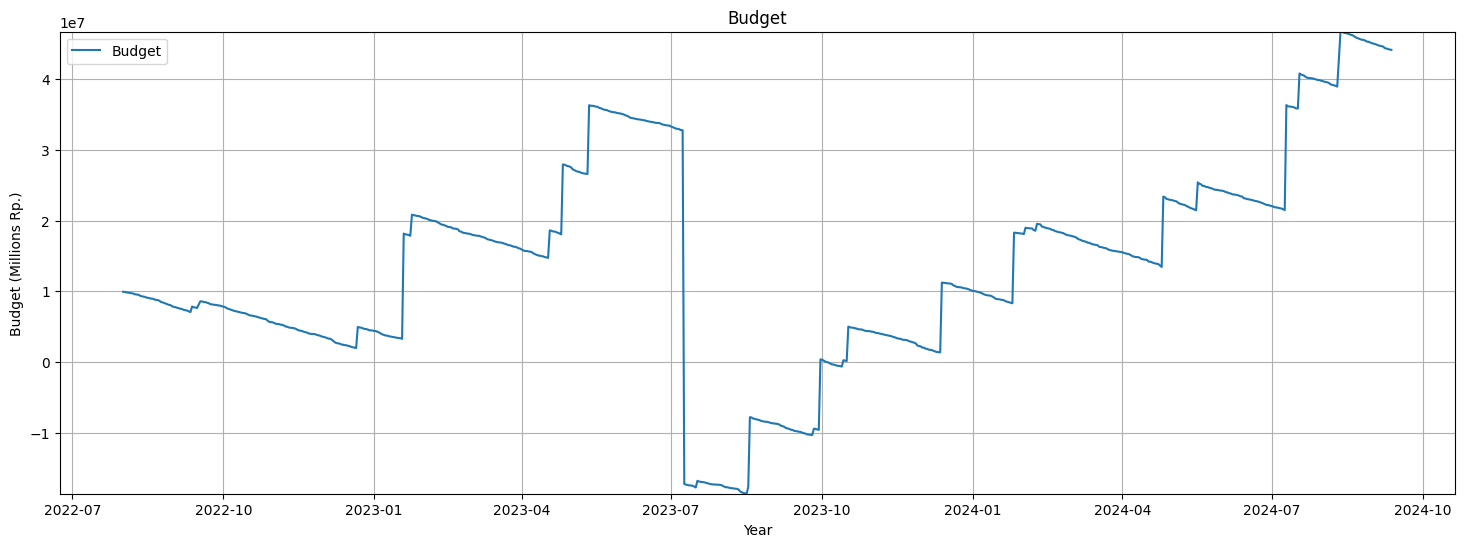

In [42]:
def getYLabel(ax):
    ylim = ax.get_ylim()
    if abs(ylim[1]) >= 1e9:
        return "Billions"
    elif abs(ylim[1]) >= 1e6:
        return "Millions"
    else:
        return ""


fig, ax = plt.subplots(figsize=(18, 6))
daily_budget.plot(ax=ax)

ax.set_title("Budget")
ax.set_xlabel("Year")

ax.set_ylim([daily_budget['Budget'].min(), daily_budget['Budget'].max()])
ax.set_ylabel(f"Budget ({getYLabel(ax)} Rp.)")
plt.grid(True)
plt.show()

In [43]:
transactions.to_csv("DATA.csv", index=False)

In [44]:
import os

file_size = os.path.getsize('DATA.csv')

print(f"{file_size} bytes")

128791 bytes
